In [1]:
# paths
database_path = "../database_recordings/"
query_path = "../query_recordings/"
fingerprint_path = "./fingerprints/"
output_file = "./output/output.txt"

# Running on a subset of the given dataset

In [2]:
import os, logging
from main import fingerprintBuilder, audioIdentification
logging.basicConfig(level=logging.WARNING)

In [6]:
fingerprintBuilder(database_path, fingerprint_path)
audioIdentification(query_path, fingerprint_path, output_file)

Building time: 1.0450351238250732 secs
Re-Building time: 0.7044181823730469 secs
Query: pop.00003-snippet-10-10.wav Best hit: pop.00003.wav at offset 10.688 secs.
Query: pop.00005-snippet-10-0.wav Best hit: pop.00005.wav at offset 1.28 secs.
Query: pop.00000-snippet-10-0.wav Best hit: pop.00000.wav at offset -0.8320000000000001 secs.
Query: pop.00004-snippet-10-10.wav Best hit: pop.00004.wav at offset 10.88 secs.
Query: pop.00000-snippet-10-10.wav Best hit: pop.00000.wav at offset 9.152000000000001 secs.
Query: pop.00005-snippet-10-10.wav Best hit: pop.00005.wav at offset 11.264 secs.
Query: pop.00004-snippet-10-0.wav Best hit: pop.00004.wav at offset 0.896 secs.
Query: pop.00003-snippet-10-0.wav Best hit: pop.00003.wav at offset 0.704 secs.
Query: pop.00000-snippet-10-20.wav Best hit: pop.00000.wav at offset 19.136 secs.
Query: pop.00009-snippet-10-10.wav Best hit: pop.00009.wav at offset 10.944 secs.
Query: pop.00009-snippet-10-0.wav Best hit: pop.00009.wav at offset 0.96 secs.
Query

(1.0, 1.0, 1.0, 4.80047603448232)

# Fingerprinting

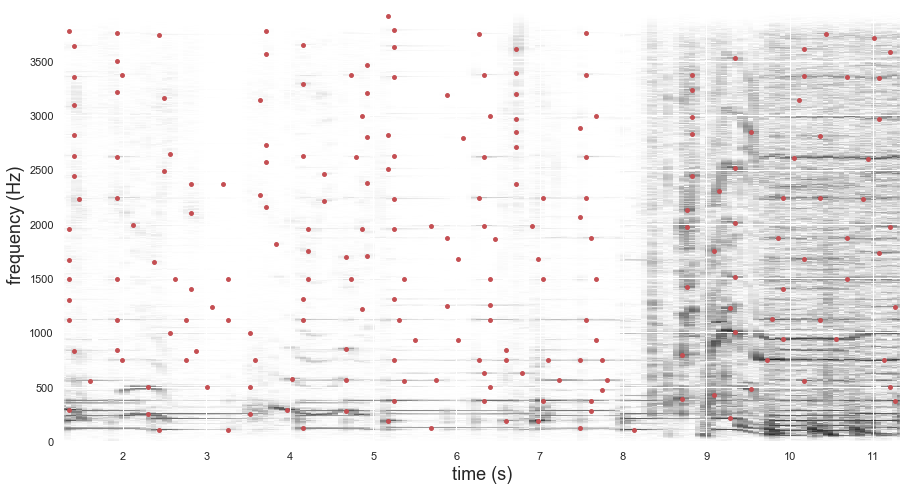

In [181]:
from main import params
from fingerprint import AudioFingerprint
FP = AudioFingerprint(file_path=os.path.join(database_path, "pop.00005.wav"), params=params, plot=True)
plt.xlim([20,177])
plt.savefig("figs/FP_pop.00005.png")

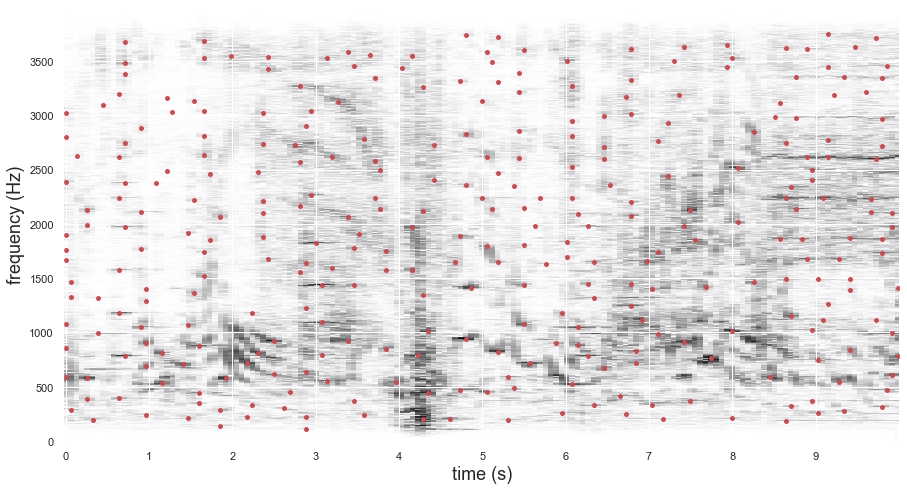

In [180]:
FP = AudioFingerprint(file_path=os.path.join(query_path, "pop.00005-snippet-10-0.wav"), params=params, plot=True)
plt.savefig("figs/FP_pop.00005.q.png")

# Plots

In [188]:
import matplotlib.pyplot as plt
import librosa
from scipy import ndimage
import numpy as np
import seaborn as sns

In [189]:
def compare_spectrum(query_file):
    q_file = os.path.join(query_path, query_file)
    gt_file = os.path.join(database_path, query_file.split("-")[0] + ".wav")
    sr = 8000
    s_q, _ = librosa.load(q_file, sr=sr)
    s_gt, _ = librosa.load(gt_file, sr=sr, offset=int(query_file.split("-")[3].split(".")[0]), duration=10)

    plt.figure(figsize=(20, 16))
    f, axes = plt.subplots(2, 1)

    sns.set(rc={'figure.figsize':(10,8)})
    spec, freq, _ = axes[0].magnitude_spectrum(s_q, Fs=sr, scale='dB')
    spec = ndimage.median_filter(spec, size=2000)
    axes[0].plot(freq, 20 * np.log10(spec), linewidth=3, color="lightblue")

    sns.set(rc={'figure.figsize':(10,8)})
    spec, freq, _ = axes[1].magnitude_spectrum(s_gt, Fs=sr, scale='dB')
    spec = ndimage.median_filter(spec, size=2000)
    axes[1].plot(freq, 20 * np.log10(spec), linewidth=3, color="lightblue")

    plt.savefig("figs/spectrum_{}.png".format(query_file.split("-")[0]))

# spectrum: pop

<Figure size 1440x1152 with 0 Axes>

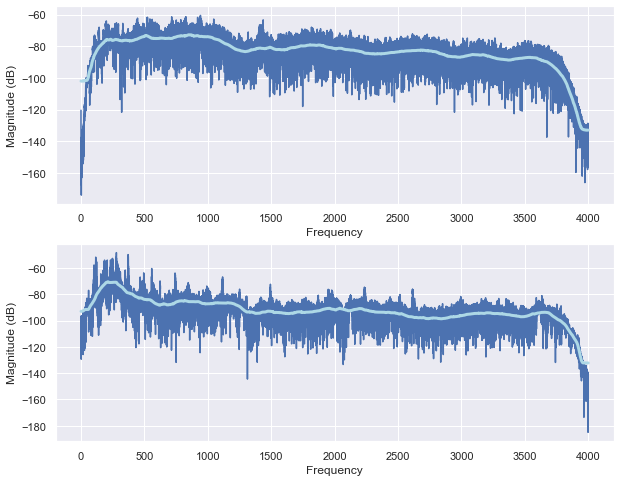

In [190]:
compare_spectrum("pop.00005-snippet-10-0.wav")

# spectrum: classical

<Figure size 1440x1152 with 0 Axes>

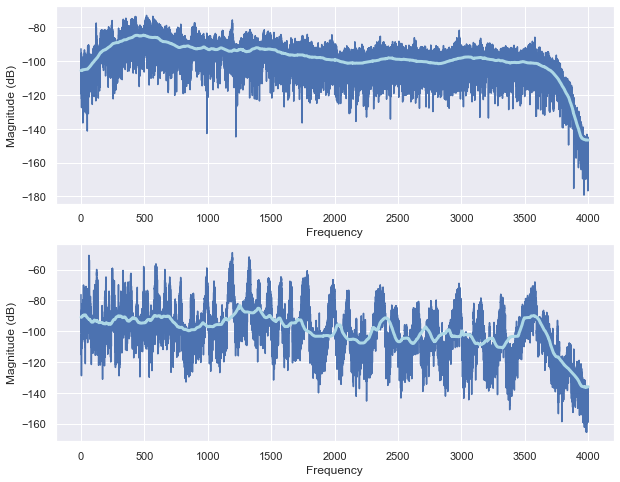

In [191]:
compare_spectrum("classical.00003-snippet-10-0.wav")